In [1]:
library("Seurat")
library("anndata")

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t



Attaching package: ‘anndata’


The following object is masked from ‘package:SeuratObject’:

    Layers




In [24]:
packageVersion("Seurat")

[1] ‘5.1.0’

In [2]:
data <- read_h5ad("./10xMapit_rawcounts.h5ad")
adata <- CreateSeuratObject(counts = t(data$X), meta.data = data$obs)

Warning message:
“Data is of class matrix. Coercing to dgCMatrix.”


In [18]:
s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$g2m.genes

In [15]:
cc.genes$g2m.genes<-c('HMGB2','CDK1','NUSAP1','UBE2C','BIRC5','TPX2','TOP2A','NDC80','CKS2','NUF2','CKS1B','MKI67','TMPO','CENPF','TACC3','PIMREG','SMC4','CCNB2','CKAP2L','CKAP2','AURKB','BUB1','KIF11','ANP32E','TUBB4B','GTSE1','KIF20B','HJURP','CDCA3','NOTCH1','CDC20','TTK','CDC25C','KIF2C','RANGAP1','NCAPD2','DLGAP5','CDCA2','CDCA8','ECT2','KIF23','HMMR','AURKA','PSRC1','ANLN','LBR','CKAP5','CENPE','CTCF','NEK2','G2E3','GAS2L3','CBX5','CENPA')

In [16]:
cc.genes$s.genes<-c('MCM5','PCNA','TYMS','FEN1','MCM2','MCM4','RRM1','UNG','GINS2','MCM6','CDCA7','DTL','PRIM1','UHRF1','CENPU','HELLS','RFC2','RPA2','NASP','RAD51AP1','GMNN','WDR76','SLBP','CCNE2','UBR7','POLD3','MSH2','ATAD2','RAD51','RRM2','CDC45','CDC6','EXO1','TIPIN','DSCC1','BLM','CASP8AP2','USP1','CLSPN','POLA1','CHAF1B','BRIP1','E2F8')

In [4]:
adata <- NormalizeData(adata)
adata <- FindVariableFeatures(adata, selection.method = "vst")
adata <- ScaleData(adata, features = rownames(adata))

Normalizing layer: counts

Finding variable features for layer counts

Centering and scaling data matrix



In [5]:
adata <- RunPCA(adata, features = VariableFeatures(adata), ndims.print = 6:10, nfeatures.print = 10)

PC_ 6 
Positive:  TPM1, KRT17, CCN5, KRT7, IGFBP7, TM4SF1, MYL9, TAGLN, TPM2, LPL 
Negative:  RPS8, RARRES1, RPS11, RPL12, RPS12, RPL22, RPL28, RPL23, LXN, RPL36 
PC_ 7 
Positive:  AQP3, ADAMTS6, SERF2, MUC16, IGFL2-AS1, CCDC80, ALDH3A1, UBC, S100A4, SPINK6 
Negative:  HSP90AA1, RRM2, NCL, HSPE1, TNFRSF12A, CLSPN, ATAD2, MCM10, CCND1, HSPH1 
PC_ 8 
Positive:  SCD, RHOBTB3, LUM, FDFT1, CCDC80, SC5D, FADS2, INSIG1, CYP51A1, MSMO1 
Negative:  OASL, ISG15, IFIT2, DDX58, IFIT3, IFIT1, HERC5, IFI44, DDX60, HERC6 
PC_ 9 
Positive:  OASL, DDX58, IFIT1, IFIT2, IFIT3, IFI44, ISG15, LINC00458, DDX60, HERC5 
Negative:  CA5A, RSPO3, CGA, NPTX1, CD24, SORBS2, FSTL4, SOX4, FOXQ1, SNCA 
PC_ 10 
Positive:  CA5A, IFIT1, OASL, IFIT2, IFIT3, ISG15, IFI44, DDX58, TLE4, RSPO3 
Negative:  AQP3, BZW1, SGK1, CRABP2, PSCA, TIMP1, RRM2, SLPI, CLDN1, CPEB4 



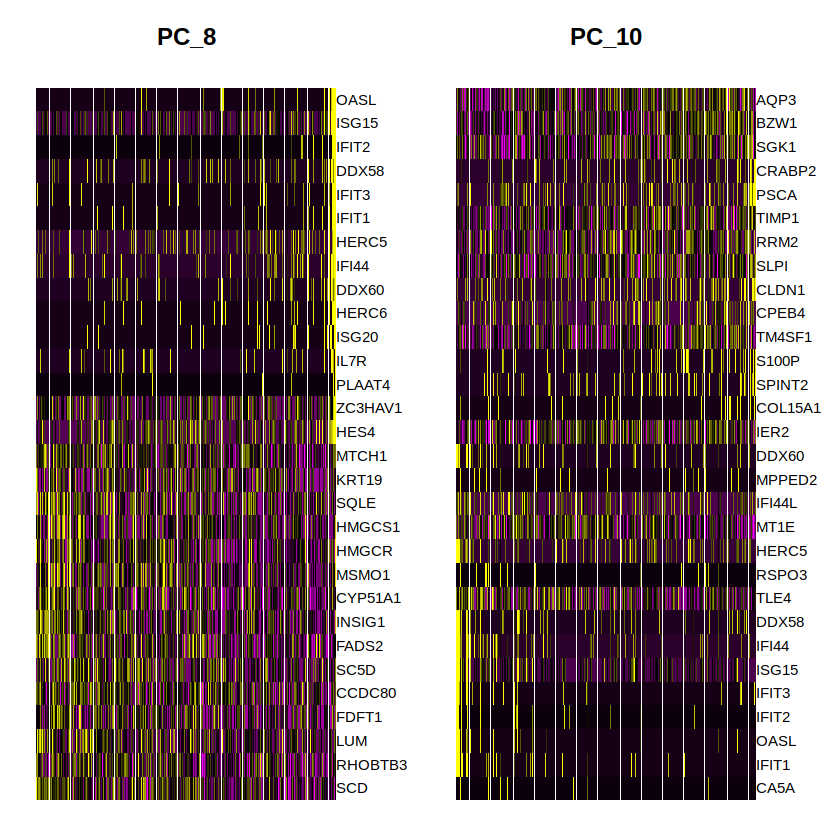

In [6]:
DimHeatmap(adata, dims = c(8, 10))

In [19]:
adata <- CellCycleScoring(adata, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE)

# view cell cycle scores and phase assignments
head(adata[[]])

,orig.ident,nCount_RNA,nFeature_RNA,batch,percent_mito,n_counts,percent_ribo,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,n_genes,S.Score,G2M.Score,Phase,old.ident
,<fct>,<dbl>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
AAACCCAAGCAGGCAT-Anti-G3BP1,SeuratProject,12879,4474,Anti-G3BP1,0.05877785,12879,0.1096358,4474,8.406262,12879,9.463431,23.14621,29.89363,37.95326,51.19963,4474,0.18189671,-0.2055296,S,S
AAACCCACAGTATACC-Anti-G3BP1,SeuratProject,30402,6788,Anti-G3BP1,0.07005887,30403,0.1059435,6789,8.823206,30403,10.322330,23.00760,29.64839,37.80219,50.71210,6789,-0.10060493,0.2334831,G2M,G2M
AAACCCACAGTTTGGT-Anti-G3BP1,SeuratProject,13458,4103,Anti-G3BP1,0.05565463,13458,0.1846485,4103,8.319717,13458,9.507403,24.27552,33.92034,44.68717,59.26586,4103,-0.00625867,-0.4674796,G1,G1
AAACCCATCGGTAGGA-Anti-G3BP1,SeuratProject,15699,4454,Anti-G3BP1,0.04802854,15699,0.1719218,4454,8.401782,15699,9.661416,21.07778,30.66437,41.75425,57.17562,4454,-0.05966555,-0.3709959,G1,G1
AAACGAAAGCGGTAGT-Anti-G3BP1,SeuratProject,19828,5323,Anti-G3BP1,0.05325802,19828,0.1503430,5323,8.579980,19828,9.894901,23.43151,31.89429,41.15392,54.24148,5323,-0.17726101,0.5962546,G2M,G2M
AAACGAAGTAGTCTGT-Anti-G3BP1,SeuratProject,28552,6018,Anti-G3BP1,0.05901513,28552,0.1730527,6018,8.702676,28552,10.259518,24.23998,33.47927,43.32446,56.83315,6018,0.07480064,0.1411361,G2M,G2M


Picking joint bandwidth of 0.0805

Picking joint bandwidth of 0.121

Picking joint bandwidth of 0.0724

Picking joint bandwidth of 0.0964



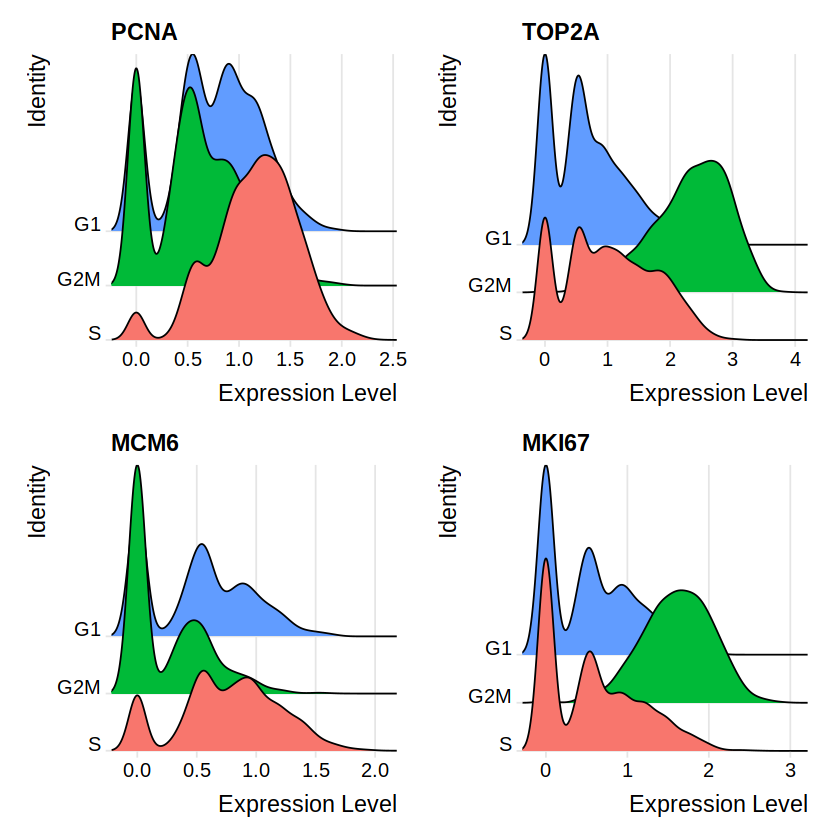

In [20]:
RidgePlot(adata, features = c("PCNA", "TOP2A", "MCM6", "MKI67"), ncol = 2)

In [21]:
table(adata[["Phase"]])

Phase
  G1  G2M    S 
2166 2939 2240 

In [22]:
write.csv(adata[[]],file="Seurat_phase.csv")

Warning message in PrepDR5(object = object, features = features, layer = layer, :
“The following features were not available: MLF1IP, FAM64A, HN1.”
Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
PC_ 1 
Positive:  TOP2A, TPX2, GTSE1, MKI67, KIF2C, CENPF, CDC20, DLGAP5, NUSAP1, CDCA3 
	   AURKA, UBE2C, ANLN, NUF2, CENPE, KIF20B, CKS2, HMMR, NEK2, TUBB4B 
	   CDCA8, KIF23, ECT2, CCNB2, TTK, HMGB2, CENPA, AURKB, CDK1, BUB1 
Negative:  MCM2, MCM6, MCM4, MCM5, HELLS, SLBP, PCNA, CDCA7, UNG, WDR76 
	   DTL, CDC6, GINS2, CCNE2, CLSPN, CASP8AP2, MSH2, NASP, POLD3, TIPIN 
	   UHRF1, RFC2, POLA1, RPA2, ATAD2, CHAF1B, PRIM1, FEN1, GMNN, DSCC1 
PC_ 2 
Positive:  CCNB2, BIRC5, TUBB4B, CDC20, CENPF, CKS2, NEK2, DLGAP5, RANGAP1, CKAP5 
	   NCAPD2, CDCA7, CENPE, BUB1, CKS1B, CENPA, HMMR, ANP32E, LBR, GAS2L3 
	   ECT2, TIPIN, AURKA, CDCA3, NUF2, G2E3, CTCF, TPX2, CKAP2, KIF20B 
Negative:  RRM2, 

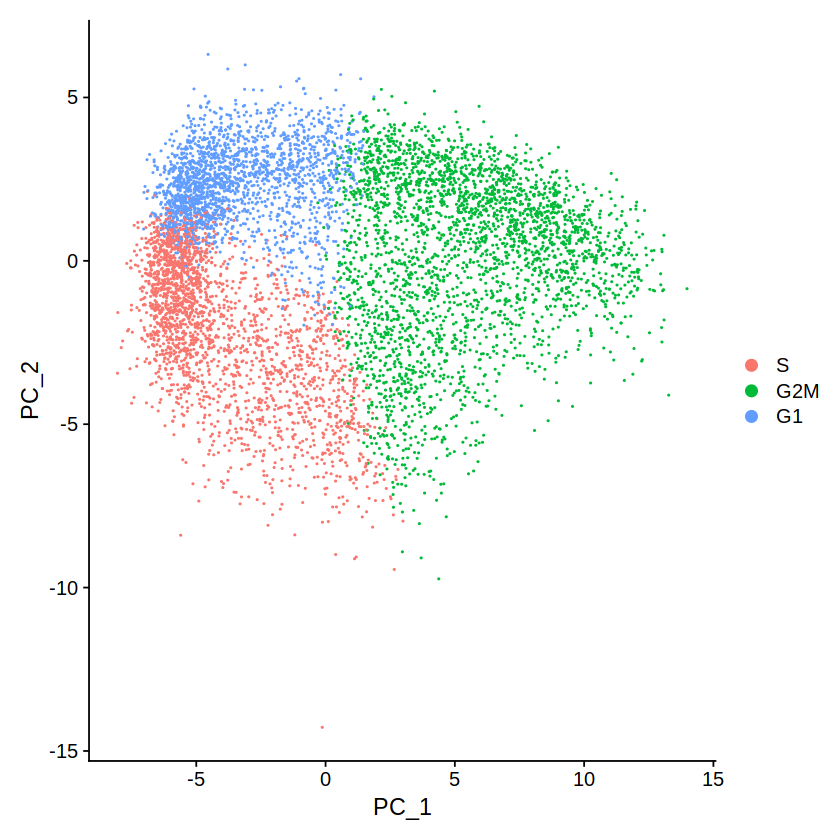

In [11]:
adata <- RunPCA(adata, features = c(s.genes, g2m.genes))
DimPlot(adata)

In [12]:
adata@reductions$pca[[]]

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,⋯,PC_41,PC_42,PC_43,PC_44,PC_45,PC_46,PC_47,PC_48,PC_49,PC_50
AAACCCAAGCAGGCAT-Anti-G3BP1,-3.6954439,-4.4031299,1.66543757,-0.51461316,-0.64262456,0.80358165,1.11449593,1.83224258,-1.271162420,-0.56169047,⋯,0.58225452,-0.16896267,-0.69519085,-0.200506949,-0.68005120,-1.23149103,0.98347216,-0.36499140,0.343455945,-0.69238251
AAACCCACAGTATACC-Anti-G3BP1,4.1186584,-1.0556155,0.57017279,1.35651087,-1.34623841,1.18375930,0.77827476,-1.15005267,-0.345402176,-0.07034043,⋯,0.43527748,0.07243691,-0.83870245,-0.766386663,-0.86478860,0.01061778,-0.30451786,0.11953246,-0.578575633,-0.15697468
AAACCCACAGTTTGGT-Anti-G3BP1,-6.2860479,1.6207440,-1.34857362,0.86133857,-2.57833809,0.17966525,-0.24605636,-1.27896439,-0.999103148,0.35510214,⋯,-0.34582047,-0.56227209,0.22678969,0.111831561,0.17064287,-0.90824998,0.50491758,0.11270969,-0.626479909,-0.54088627
AAACCCATCGGTAGGA-Anti-G3BP1,-4.6151776,1.3353124,-0.93596929,0.43902534,-0.14107473,-0.18028913,-2.19002614,-0.58206275,1.165184517,-0.24974335,⋯,0.44284236,-0.47726591,1.01952300,-2.079166480,-0.56916579,0.13053173,0.70113400,0.18640903,-0.178456877,0.84161595
AAACGAAAGCGGTAGT-Anti-G3BP1,9.2159555,-0.5437408,-0.83492820,0.73832995,-1.14703081,0.61396580,-0.06247537,-0.60883503,-0.844691317,-0.72629791,⋯,1.30181811,-0.28533119,-0.15131779,-1.456600178,-1.11732755,-0.19167610,-0.20396628,0.11276960,-0.072941272,-2.27380575
AAACGAAGTAGTCTGT-Anti-G3BP1,2.8221245,-3.8898337,-2.75521542,-1.73639599,0.73551669,1.37366650,-0.56333333,-0.90937958,-0.454379407,-1.32355646,⋯,0.04696422,-1.31036291,0.44366534,-0.481333579,-1.26909934,-0.76149110,0.06872589,0.41982975,-0.337488387,-1.01426376
AAACGAAGTGGGAGAG-Anti-G3BP1,-6.6180543,1.4426822,-2.01620416,0.05196297,-0.81164148,0.81994895,-0.30628548,0.06286869,-0.395517536,0.42919468,⋯,0.19841424,-0.20646922,0.21812409,0.007056654,-0.57158881,0.79664197,-0.13101665,0.79828837,-0.029047595,0.01022232
AAACGAATCTGTCTCG-Anti-G3BP1,11.6319895,1.0762251,-1.74429453,-0.37918036,-0.50006693,-0.57964905,-0.25100694,0.96897535,-0.570338297,0.40992851,⋯,-0.13026925,-0.45645187,-0.33565017,0.651638649,0.81032499,0.20821703,-2.26574071,-0.33827719,-0.290238887,0.52048514
AAACGCTCATGAGGGT-Anti-G3BP1,1.2059785,-3.1141831,-1.36041899,-1.97945006,1.32777099,-0.20105029,0.78809208,-0.29391516,0.018343394,-0.67244029,⋯,1.33692087,-1.84332752,1.32184417,0.958900195,0.70058985,1.08187608,-0.74756289,-0.55520970,0.530921763,0.51287983
AAACGCTGTAATCAGA-Anti-G3BP1,-0.2327990,-4.4298134,-0.38497135,-0.16046279,-1.00925855,0.59144292,0.57444275,-1.14581941,-1.054340320,-0.17600831,⋯,0.19312531,-1.20560793,0.37405375,-0.182067870,-0.21433931,-1.32550693,0.33973428,-1.02614783,-0.870823060,0.45371292
